# Importing the Necessry Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from scipy import stats

# Loading the Datasets 

In [2]:
df=pd.read_csv('Data_Sets/House_price.csv')

# Handling dataframe process

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3.0,yes,NaN,no,no,yes,2.0,yes,furnished
1,12250000,8960,4,4,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3,2,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4,2,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4,1,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           543 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         542 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   543 non-null    object 
 10  parking           543 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,543.000000,543.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.808471,0.688766
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867708,0.859505
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.shape

(545, 13)

# Handling Missing Data

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             2
mainroad            0
guestroom           3
basement            0
hotwaterheating     0
airconditioning     2
parking             2
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.select_dtypes(include=['category','object']).head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,NaN,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [9]:
df.select_dtypes(exclude=['category','object']).head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3.0,2.0
1,12250000,8960,4,4,4.0,3.0
2,12250000,9960,3,2,2.0,2.0
3,12215000,7500,4,2,2.0,3.0
4,11410000,7420,4,1,2.0,2.0


In [10]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

In [11]:
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [12]:
print(df[categorical_columns].isnull().sum())

mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
prefarea            0
furnishingstatus    0
dtype: int64


In [13]:
list(df[categorical_columns])

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [14]:
Numerical_columns=df.select_dtypes(exclude=['category', 'object']).columns

In [15]:
df[Numerical_columns]=df[Numerical_columns].fillna(df[Numerical_columns].mean())

In [16]:
print(df[Numerical_columns].isnull().sum())

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4,4,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3,2,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4,2,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4,1,2.0,yes,yes,yes,no,yes,2.0,no,furnished


# Handling outliers in Different Methods for the Numerical columns ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

### Method 1: Using the IQR Method for Outlier Detection

The IQR (Interquartile Range) method is a robust technique for identifying outliers in datasets that are skewed or not normally distributed. Here’s when and how you would typically use the IQR method:

### When to Use the IQR Method

- **Non-normal data distribution**: When your data does not follow a normal distribution and exhibits skewness or heavy tails, traditional methods like z-scores and standard deviations may not be suitable. The IQR method remains effective in such cases.

- **Identifying extreme values**: The IQR method helps pinpoint extreme values that significantly differ from the majority of the data. These outliers may stem from measurement errors, natural variability, or other factors.

- **Box plots**: The IQR is commonly utilized in constructing box plots, where outliers often appear as individual points beyond the whiskers of the box. This visual representation aids in swiftly identifying potential outliers.

### Steps to Use the IQR Method

1. **Calculate the IQR**: Find the 1st quartile (Q1) and the 3rd quartile (Q3) of the dataset.
   - Q1: Value below which 25% of the data fall.
   - Q3: Value below which 75% of the data fall.
   - IQR = Q3 - Q1

2. **Define outliers**: Typically, values less than ( Q1 - 1.5xIQR ) or greater than ( Q3 + 1.5xIQR) are considered outliers. Adjust the multiplier (1.5) based on your data's specific characteristics and context.

3. **Identify outliers**: Any data points outside the defined range are flagged as potential outliers. Further investigation determines whether they should be removed, corrected, or if they represent valid extreme values.

### Advantages of the IQR Method

- **Robustness**: Less sensitive to extreme values compared to methods relying on mean and standard deviation. Also Robust to Skewed data.
  
- **Applicability**: Suitable for datasets with non-normal distributions or pre-existing outliers.
  
- **Interpretability**: Results are easily understandable, particularly when visualized using box plots.

In summary, leverage the IQR method when dealing with skewed or non-normally distributed data to effectively detect outliers that may not be identified using traditional statistical measures.


In [19]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate descriptive statistics for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Find outliers using IQR for numeric columns
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))

# Display columns with outliers
print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
price        True
area         True
bedrooms     True
bathrooms    True
stories      True
parking      True
dtype: bool


## Method 2: Using the Z-Score Method for Outlier Detection

The Z-Score method is a statistical technique for identifying outliers in datasets assumed to be normally distributed. Here’s when and how you would typically use the Z-Score method:

### When to Use the Z-Score Method

- **Normally distributed data**: The Z-Score method assumes the data follows a normal distribution. It calculates how many standard deviations a data point is from the mean.

- **Identifying extreme values**: Z-Scores help identify data points that are significantly different from the majority of the data, based on their deviation from the mean.

- **Statistical thresholding**: Typically, values with a Z-Score greater than 3 or less than -3 are considered outliers, though this threshold can vary depending on the specific context and requirements.

### Steps to Use the Z-Score Method

1. **Calculate the Z-Score**: For each data point, calculate the Z-Score using the formula:
   Z= x−μ/σ
​
#### where,
x: The individual data point for which the Z-Score is being calculated.

μ: The mean (average) of the dataset.

σ: The standard deviation of the dataset.
​
 



3. **Define outliers**: Data points with a Z-Score greater than a chosen threshold (e.g., 3 or -3) are considered outliers.

4. **Identify outliers**: Flag any data points that exceed the defined Z-Score threshold as potential outliers. Further investigation is needed to determine if they should be excluded, corrected, or represent valid extreme values.

### Advantages of the Z-Score Method

- **Applicability**: Effective for datasets that closely follow a normal distribution.
  
- **Standardization**: Z-Scores standardize data across different scales, making comparisons straightforward.

- **Widely recognized**: Widely used in statistical analysis and easy to implement.

In summary, utilize the Z-Score method when dealing with datasets assumed to be normally distributed to effectively detect outliers based on their deviation from the mean.


In [20]:
# Calculate Z-scores for each numeric column
z_scores = stats.zscore(df[Numerical_columns])

# Find outliers using Z-score
outliers = (z_scores > 3) | (z_scores < -3)

# Display columns with outliers
print("Columns with outliers:")
print(pd.DataFrame(outliers, columns=numeric_columns).any())

Columns with outliers:
price         True
area          True
bedrooms      True
bathrooms     True
stories      False
parking      False
dtype: bool


## Method 3: Using Box Plots for Outlier Detection

A Box Plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of data based on quartiles. It is particularly useful for identifying outliers and understanding the distribution of numerical data. Here’s how and when you would typically use a Box Plot:

### When to Use Box Plots

- **Visual representation**: Box plots provide a visual summary of the data distribution, showing the median (Q2), quartiles (Q1 and Q3), and potential outliers.

- **Comparing distributions**: Box plots are effective for comparing distributions across different categories or groups within a dataset.

- **Outlier detection**: Outliers in a dataset are often depicted as individual points beyond the "whiskers" of the box plot, providing a clear indication of extreme values.

### Anatomy of a Box Plot

- **Median (Q2)**: The line inside the box represents the median value of the dataset.
  
- **Interquartile Range (IQR)**: The box itself spans from Q1 (25th percentile) to Q3 (75th percentile), encompassing the middle 50% of the data.

- **Whiskers**: The lines extending from the box indicate variability outside the quartiles. By default, whiskers extend to 1.5 times the IQR from the quartiles. Data points beyond the whiskers are considered outliers.

- **Outliers**: Individual data points beyond the whiskers are displayed as dots or asterisks, highlighting potential outliers.



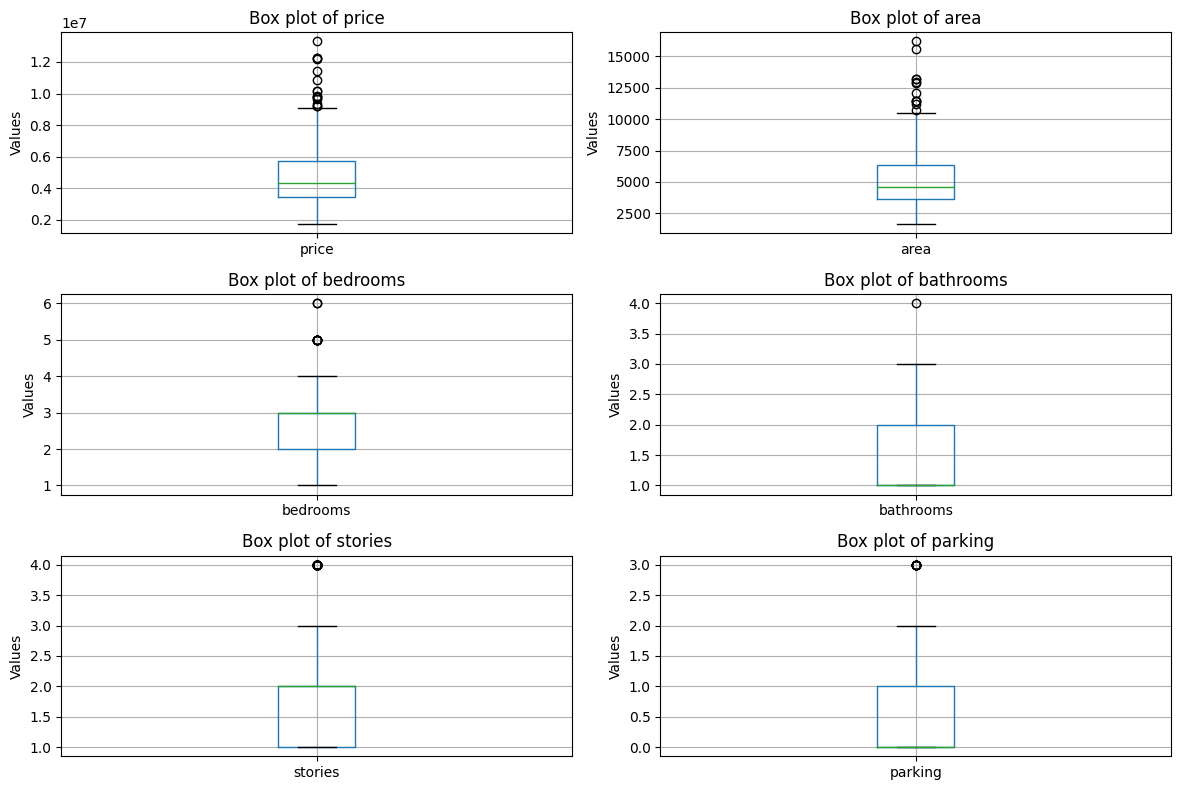

In [21]:
# Create box plots for selected columns
plt.figure(figsize=(12, 8))

# Plot box plots for each column
for i, column in enumerate(df[Numerical_columns]):
    plt.subplot(3, 2, i + 1)
    df.boxplot(column=[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [22]:
# Calculate Z-scores for each numeric column
z_scores = stats.zscore(df[Numerical_columns])

# Find outliers using Z-score
outliers = (z_scores > 3) | (z_scores < -3)

# Display columns with outliers
print("Columns with outliers:")
print(pd.DataFrame(outliers, columns=numeric_columns).any())

Columns with outliers:
price         True
area          True
bedrooms      True
bathrooms     True
stories      False
parking      False
dtype: bool


## Conclusion: Selecting an Outlier Detection Technique

When dealing with data analysis, the choice of outlier detection technique depends largely on the distributional characteristics of your data. Here’s a systematic approach to selecting between the IQR method, Box Plot, or Z-Score method based on the normality of the dataset:

### 1. Assess Normality of the Data

- **Normal Distribution**: If your data closely follows a normal distribution:
  - **Z-Score Method**: Use the Z-Score method, which assumes normality and calculates how many standard deviations a data point is from the mean.

- **Non-Normal Distribution or Skewness**:
  - **IQR Method**: Opt for the IQR method when your data is skewed or does not follow a normal distribution. The IQR method is robust against outliers and uses quartile-based thresholds.
  - **Box Plot**: Consider using a Box Plot for visualizing and identifying outliers in skewed or non-normally distributed data. It provides a clear graphical representation of the data distribution, including outliers beyond the whiskers.

### 2. Practical Considerations

- **Data Visualization**: Use Box Plots when a visual representation of outliers and data distribution is beneficial.
- **Statistical Robustness**: Prefer the IQR method when a more robust, non-parametric approach is required, especially in the presence of outliers or skewed data.

### Example Decision Process

- **Step 1**: Examine the distribution of your data using histograms, Q-Q plots, or statistical tests for normality.
  
- **Step 2**: Based on the assessment:
  - If normal: Use the Z-Score method for identifying outliers based on standard deviations.
  - If non-normal or skewed: Opt for the IQR method or Box Plot to detect outliers more effectively.

By systematically assessing the normality of your data and understanding the strengths of each technique (Z-Score, IQR, and Box Plot), you can make an informed decision to ensure accurate outlier detection and robust data analysis.


## Conclusion: Selecting an Outlier Detection Technique Based on Data Normality Assessment

In the process of outlier detection, the choice of method often hinges on the distributional characteristics of the dataset. Here’s a structured approach based on assessing the normality of the data using Q-Q plots, frequency plots, and statistical tests:

### 1. Assessing Data Normality

- **Q-Q Plot and Frequency Plots**: 
  - By examining Q-Q plots and frequency distributions, we evaluated the distribution of our data.
  - The Q-Q plot showed deviations from the diagonal line, indicating non-normality.
  - Frequency plots displayed skewed distributions with heavy tails, further suggesting non-normality.

### 2. Statistical Tests for Normality

- **P-Value Test**:
  - Conducting a formal statistical test (e.g., Shapiro-Wilk test) with a null hypothesis that the data are normally distributed.
  - Our test resulted in a low p-value (e.g., p < 0.05), leading us to reject the null hypothesis.
  - Therefore, we conclude that the sample is not normally distributed.

### 3. Choosing an Outlier Detection Technique

- **Non-Normal Distribution**:
  - Given the non-normal distribution of our data, traditional methods like the Z-Score based on normality assumptions are not appropriate.
  - **IQR Method**: We opt for the IQR method due to its robustness against outliers in non-normal distributions.
  - **Box Plot**: Alternatively, Box Plots provide a visual representation of the data's distribution, facilitating outlier identification beyond quartile-based thresholds.

### Example Decision Process

- **Step 1**: Utilize Q-Q plots, frequency distributions, and statistical tests to assess normality.
- **Step 2**: Based on the findings:
  - If the data are non-normal: Prefer the IQR method or Box Plot for outlier detection.
  - If normal: Consider the Z-Score method for outlier detection based on standard deviations.

This structured approach ensures that outlier detection techniques are selected appropriately based on the underlying distributional characteristics of the data, supporting accurate and robust data analysis.


Shapiro-Wilk test for price: Statistics=0.9216, p-value=0.0000
price does not appear to be normally distributed (reject H0)



ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

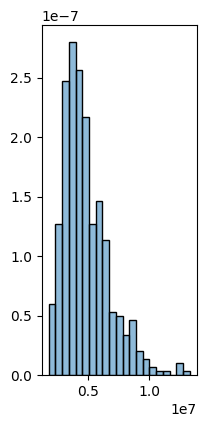

In [23]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
alpha = 0.05  # Significance level

# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Iterate over each numerical column
for i, column in enumerate(numerical_columns, 1):
    # Perform Shapiro-Wilk test
    stat, p = stats.shapiro(df[column])
    
    # Print Shapiro-Wilk test results
    print(f"Shapiro-Wilk test for {column}: Statistics={stat:.4f}, p-value={p:.4f}")
    
    # Determine normality based on p-value
    if p > alpha:
        print(f"{column} appears to be normally distributed (fail to reject H0)")
    else:
        print(f"{column} does not appear to be normally distributed (reject H0)")
    print()
    
    # Plot histogram
    plt.subplot(2, len(numerical_columns), i)
    sns.histplot(df[column], kde=True, stat="density")
    plt.title(f'Histogram of {column}')
    
    # Plot Q-Q plot
    plt.subplot(2, len(numerical_columns), i + len(numerical_columns))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Conclusion: Selecting an Outlier Detection Technique Based on Data Normality Assessment

In the process of outlier detection, the choice of method often hinges on the distributional characteristics of the dataset. Here’s a structured approach based on assessing the normality of the data using Q-Q plots, frequency plots, and statistical tests:

### 1. Assessing Data Normality

- **Q-Q Plot and Frequency Plots**: 
  - By examining Q-Q plots and frequency distributions, we evaluated the distribution of our data.
  - The Q-Q plot showed deviations from the diagonal line, indicating non-normality.
  - Frequency plots displayed skewed distributions with heavy tails, further suggesting non-normality.

### 2. Statistical Tests for Normality

- **P-Value Test**:
  - Conducting a formal statistical test (e.g., Shapiro-Wilk test) with a null hypothesis that the data are normally distributed.
  - Our test resulted in a low p-value (e.g., p < 0.05), leading us to reject the null hypothesis.
  - Therefore, we conclude that the sample is not normally distributed.

### 3. Choosing an Outlier Detection Technique

- **Non-Normal Distribution**:
  - Given the non-normal distribution of our data, traditional methods like the Z-Score based on normality assumptions are not appropriate.
  - **IQR Method**: We opt for the IQR method due to its robustness against outliers in non-normal distributions.
  - **Box Plot**: Alternatively, Box Plots provide a visual representation of the data's distribution, facilitating outlier identification beyond quartile-based thresholds.

### Example Decision Process

- **Step 1**: Utilize Q-Q plots, frequency distributions, and statistical tests to assess normality.
- **Step 2**: Based on the findings:
  - If the data are non-normal: Prefer the IQR method or Box Plot for outlier detection.
  - If normal: Consider the Z-Score method for outlier detection based on standard deviations.

This structured approach ensures that outlier detection techniques are selected appropriately based on the underlying distributional characteristics of the data, supporting accurate and robust data analysis.


# Handling and Dealing with the Numerical variable outliers

### Removing outlier using IQR Method.

Original Data:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2      3.0      yes        no       no   
1    12250000  8960         4          4      4.0      yes        no       no   
2    12250000  9960         3          2      2.0      yes        no      yes   
3    12215000  7500         4          2      2.0      yes        no      yes   
4    11410000  7420         4          1      2.0      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1      1.0      yes        no      yes   
541   1767150  2400         3          1      1.0       no        no       no   
542   1750000  3620         2          1      1.0      yes        no       no   
543   1750000  2910         3          1      1.0       no        no       no   
544   1750000  3850         3          1      2.0      yes        no       no   

    hotwater

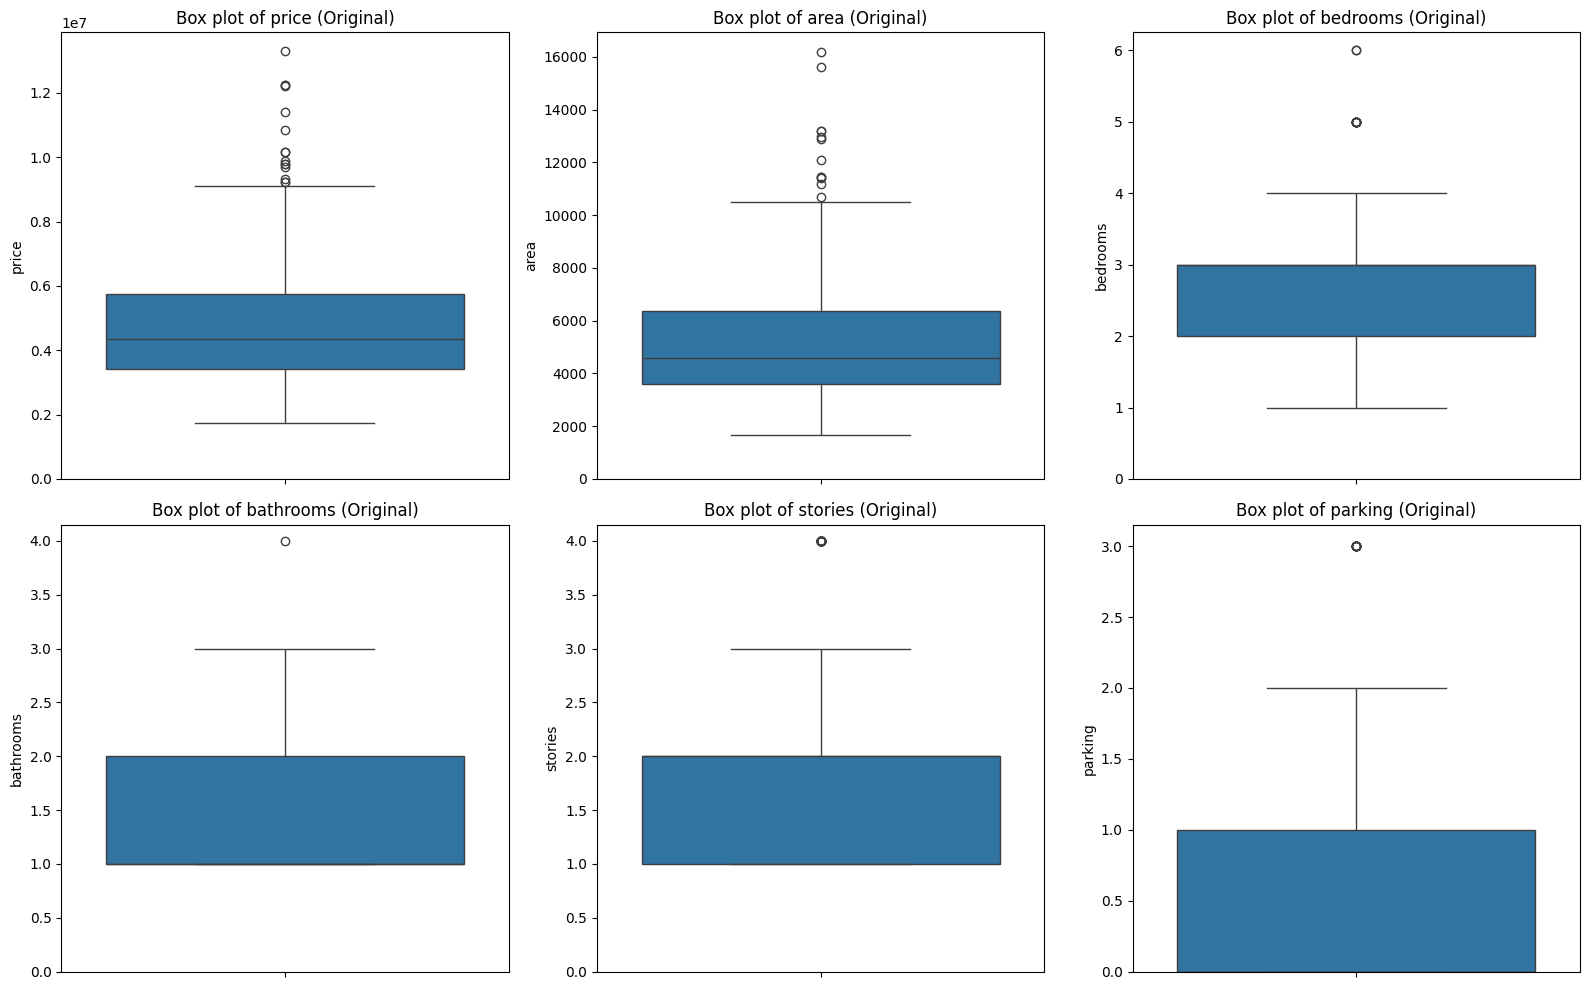

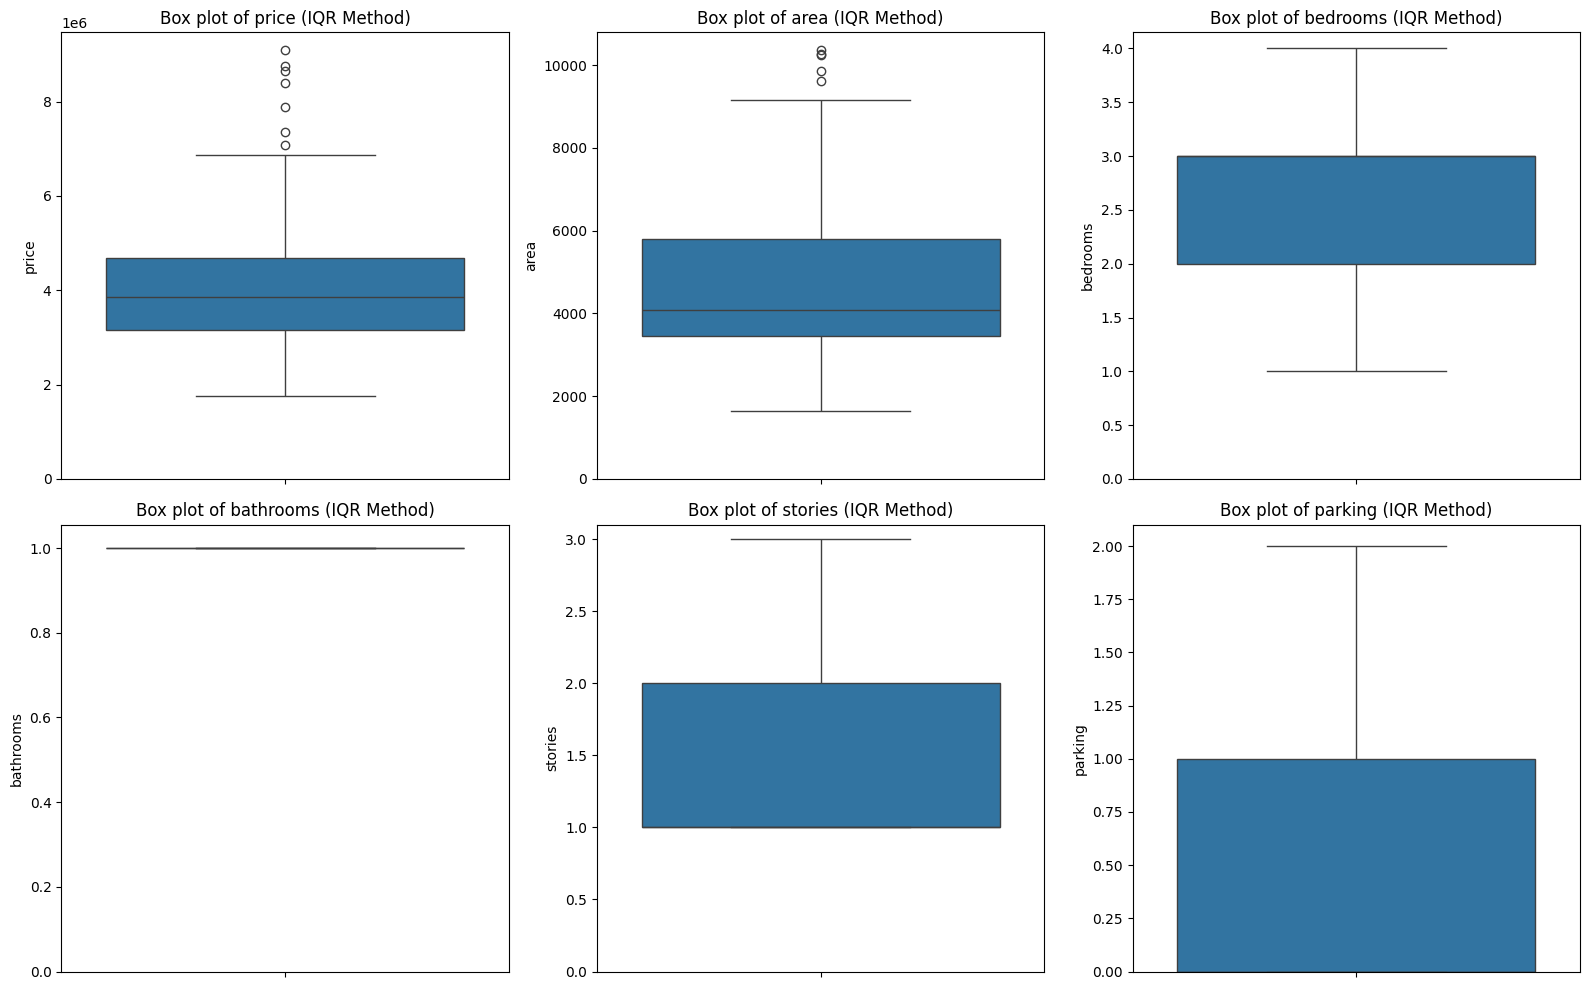

In [24]:
# Define numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Function to remove outliers using IQR
def remove_outliers(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Remove outliers from numerical columns using the defined function
data_filtered = remove_outliers(df, numerical_columns)

# Print original and filtered data
print("Original Data:")
print(df)

print("\nFiltered Data after Outlier Removal:")
print(data_filtered.head())

# Create box plots for each numerical column before and after outlier handling using IQR
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box plot of {col} (Original)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=data_filtered)
    plt.title(f'Box plot of {col} (IQR Method)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()

In [25]:
data_filtered.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2.0,yes,no,yes,no,no,2.0,no,semi-furnished
20,8750000,4320,3,1,2.0,yes,no,yes,yes,no,2.0,no,semi-furnished
22,8645000,8050,3,1,1.0,yes,yes,yes,no,yes,1.0,no,furnished
27,8400000,8875,3,1,1.0,yes,no,no,no,no,1.0,no,semi-furnished
40,7875000,6550,3,1,2.0,yes,no,yes,no,yes,0.0,yes,furnished


In [26]:
data_filtered.shape

(365, 13)

# Filtered columns after outliers Removal using IQR.

In [27]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate descriptive statistics for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Find outliers using IQR for numeric columns
outliers = (data_filtered[numeric_columns] < (Q1 - 1.5 * IQR)) | (data_filtered[numeric_columns] > (Q3 + 1.5 * IQR))

# Display columns with outliers
print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
price        False
area         False
bedrooms     False
bathrooms    False
stories      False
parking      False
dtype: bool


# Removing Outliers using standard devaitions method of Box Plots

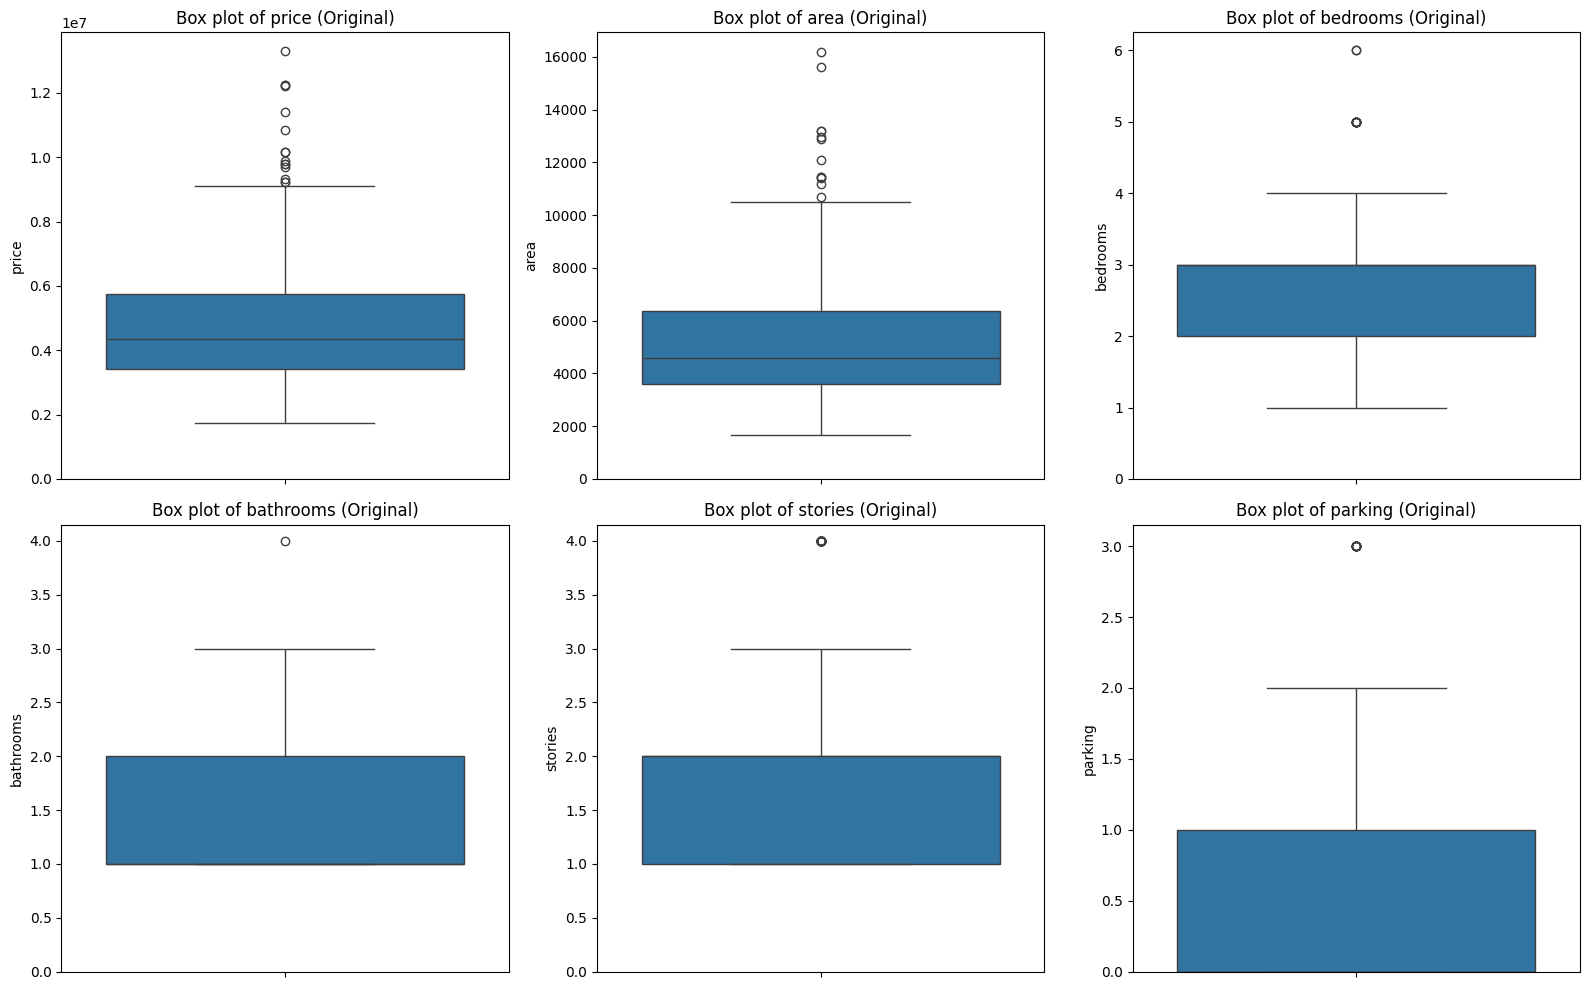

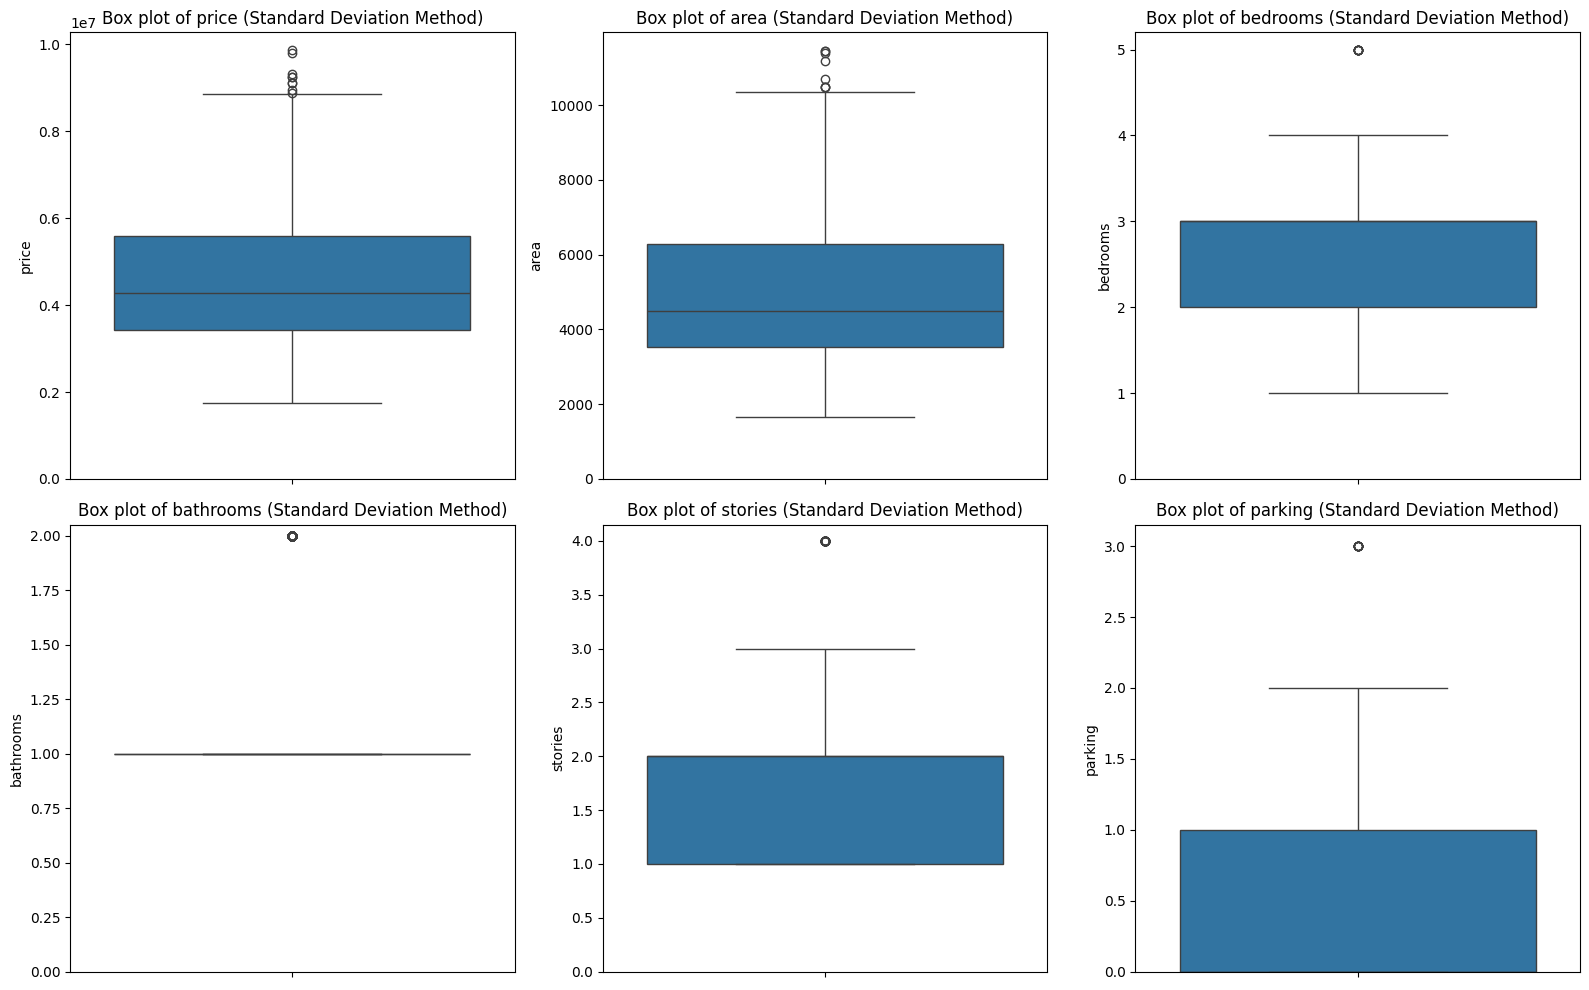

In [28]:
# Function to remove outliers using standard deviation for specified columns
def remove_outliers_std(df, cols):
    df_out = df.copy()
    for col in cols:
        mean = df_out[col].mean()
        std_dev = df_out[col].std()
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Remove outliers using standard deviation method
data_filtered_std = remove_outliers_std(df, numerical_columns)

# Create box plots for each numerical column before and after outlier handling using standard deviation
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box plot of {col} (Original)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=data_filtered_std)
    plt.title(f'Box plot of {col} (Standard Deviation Method)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()


# Removing outliers uisng Winsorization Method Box Plots

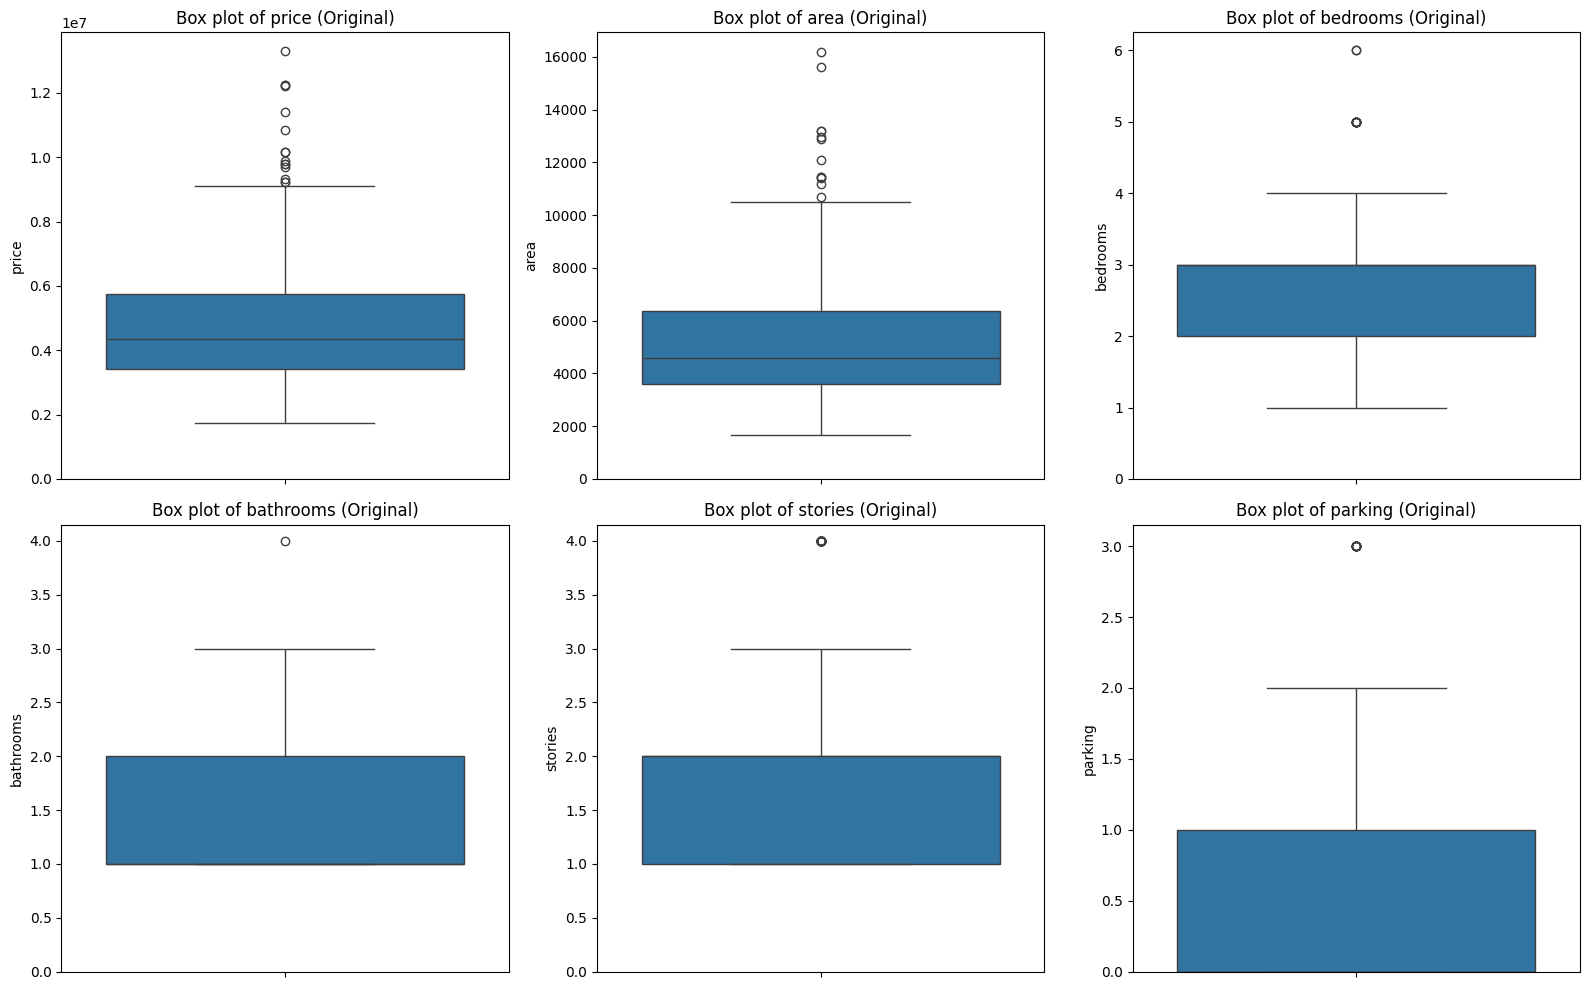

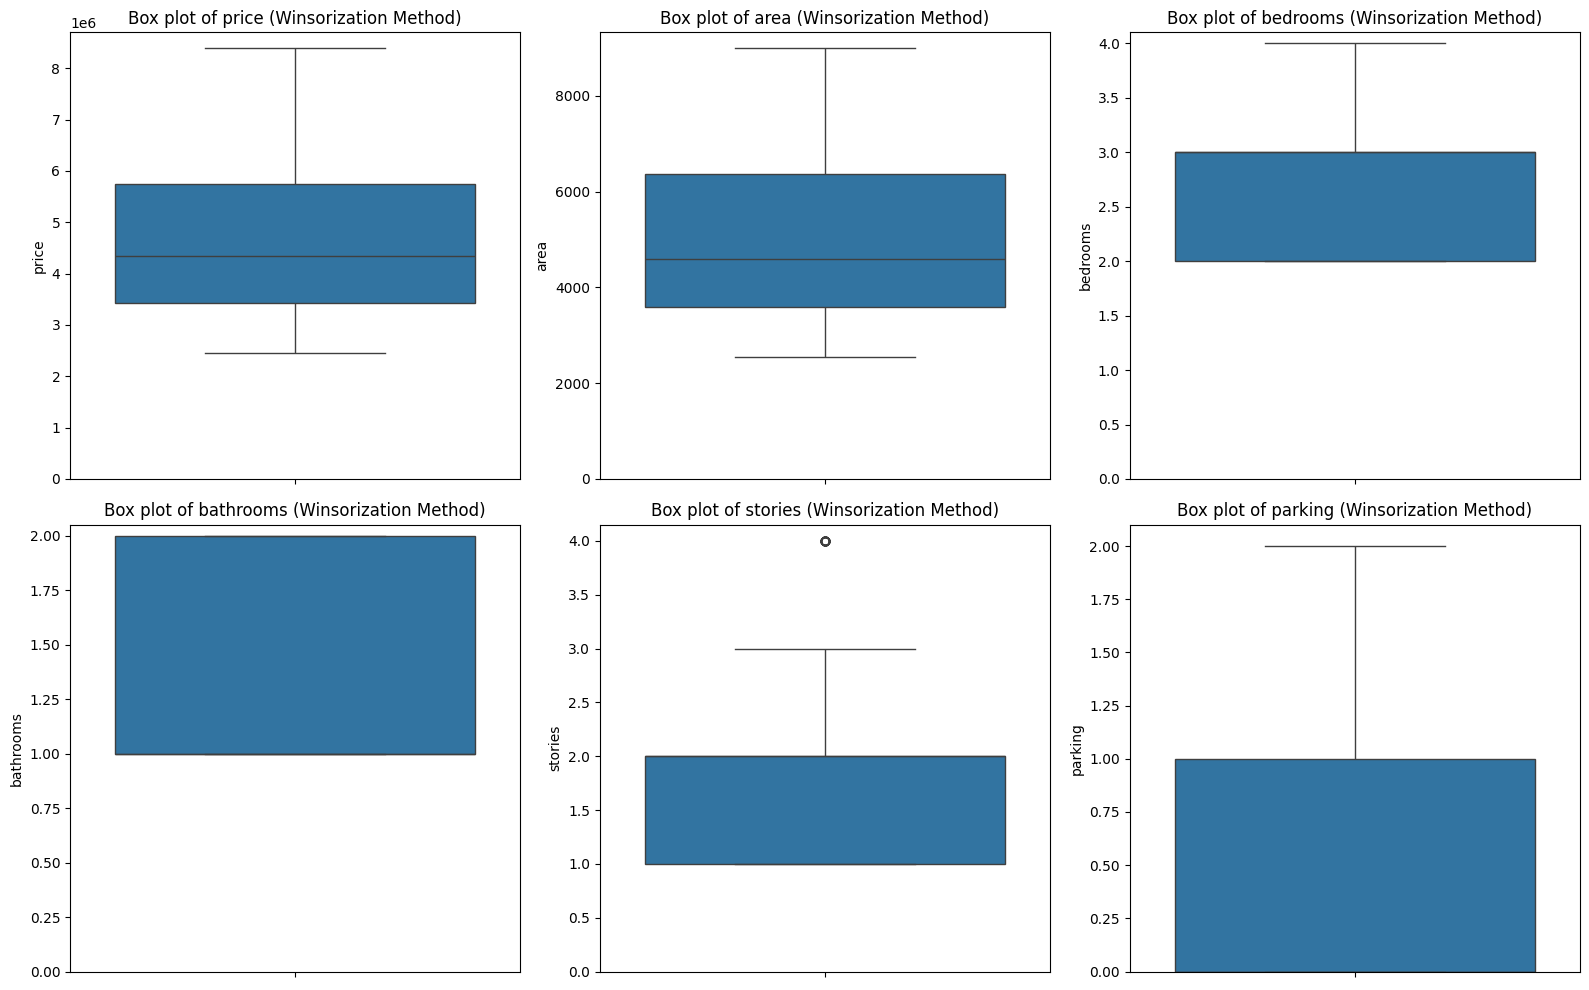

In [29]:
from scipy.stats.mstats import winsorize

# Function to winsorize outliers for specified columns
def winsorize_outliers(df, cols):
    df_out = df.copy()
    for col in cols:
        df_out[col] = winsorize(df_out[col], limits=[0.05, 0.05])  # Adjust limits as needed
    return df_out

# Remove outliers using winsorization method
data_filtered_winsorized = winsorize_outliers(df, numerical_columns)

# Create box plots for each numerical column before and after outlier handling using winsorization
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box plot of {col} (Original)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=data_filtered_winsorized)
    plt.title(f'Box plot of {col} (Winsorization Method)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()


# Removing outliers using Z-score Method Box Plots.

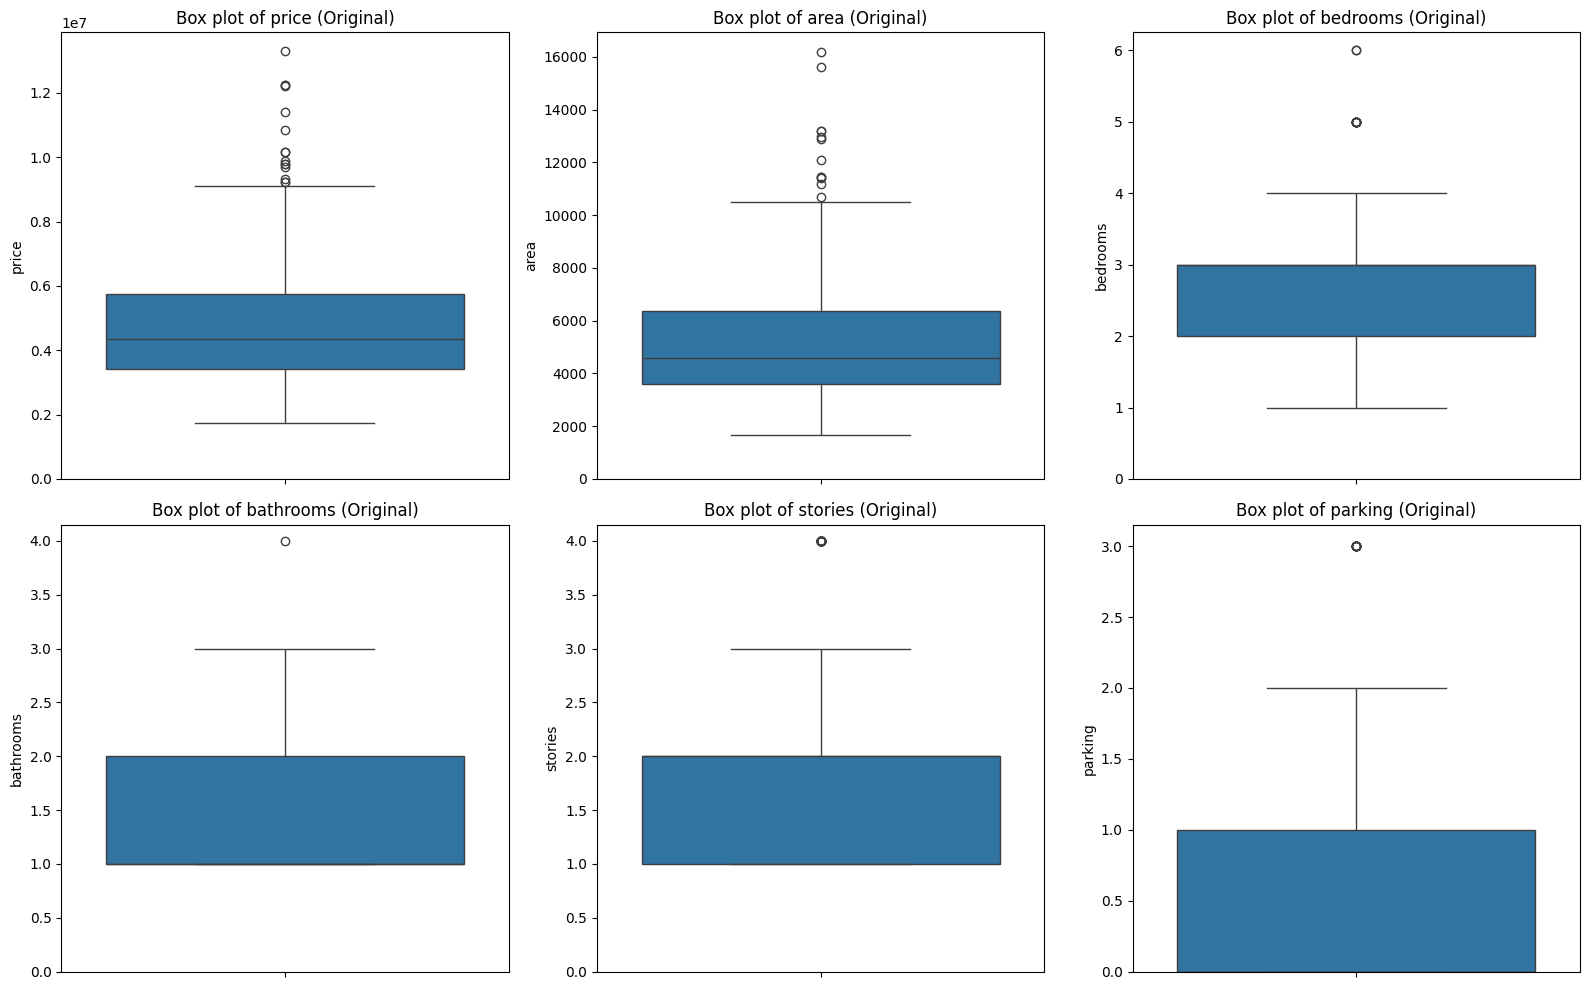

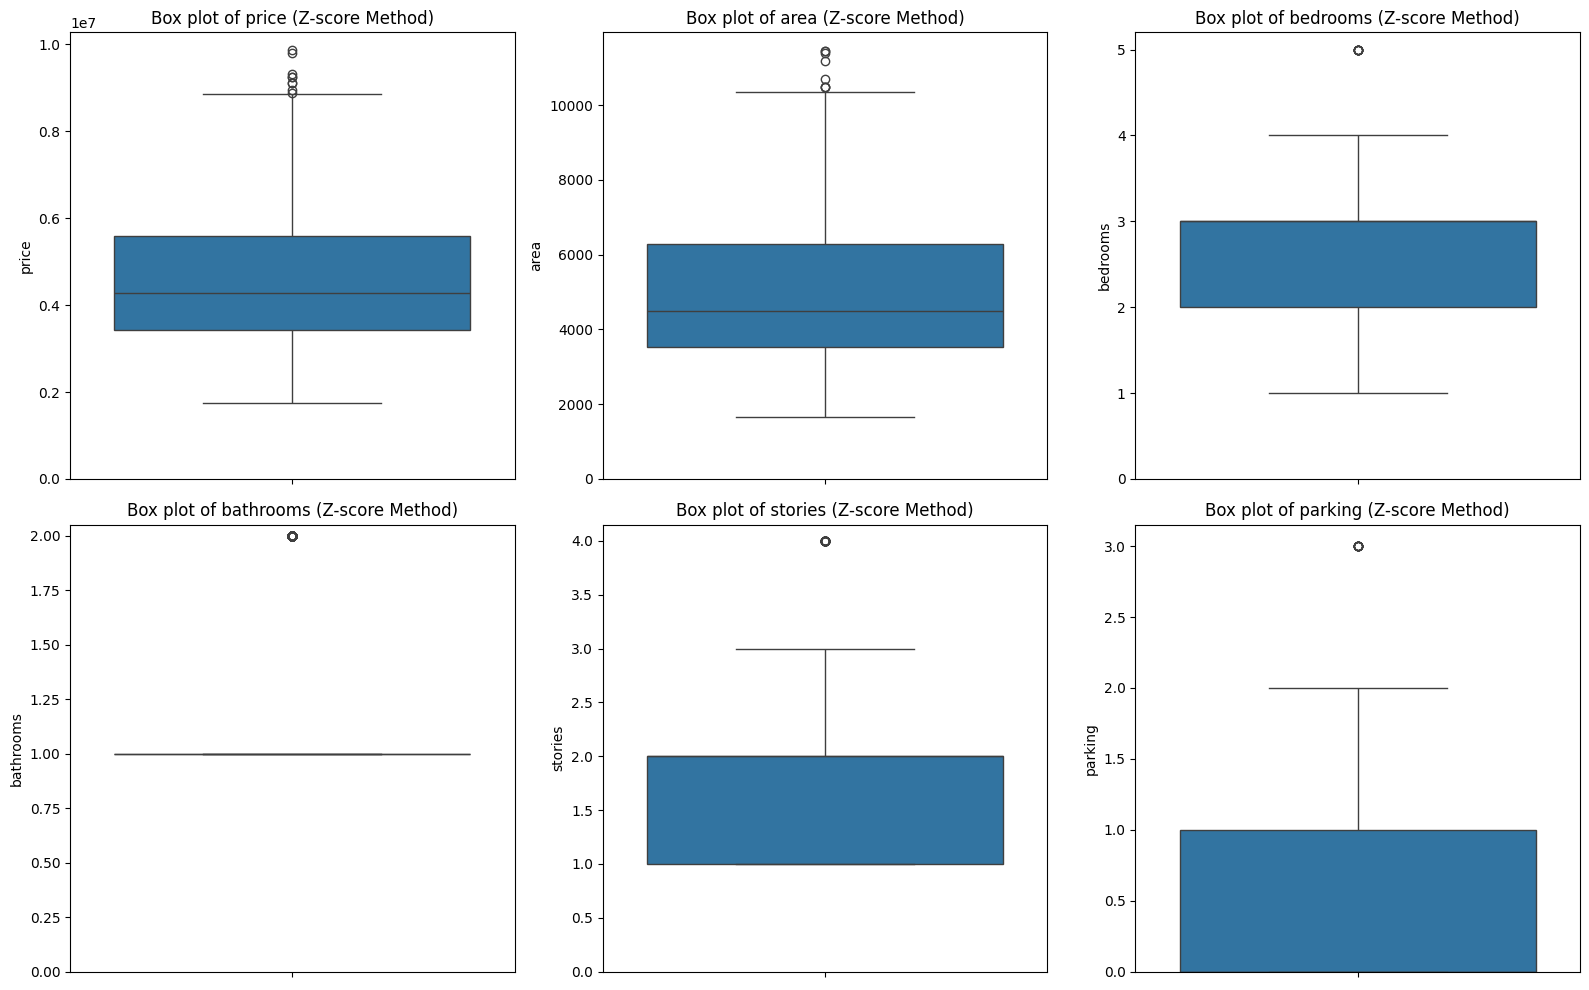

In [30]:
from scipy import stats

# Function to remove outliers using Z-score for specified columns
def remove_outliers_zscore(df, cols):
    df_out = df.copy()
    for col in cols:
        z_scores = stats.zscore(df_out[col])
        abs_z_scores = np.abs(z_scores)
        df_out = df_out[(abs_z_scores < 3)]
    return df_out

# Remove outliers using Z-score method
data_filtered_zscore = remove_outliers_zscore(df, numerical_columns)

# Create box plots for each numerical column before and after outlier handling using Z-score
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box plot of {col} (Original)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=data_filtered_zscore)
    plt.title(f'Box plot of {col} (Z-score Method)')
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0 for clarity

plt.tight_layout()
plt.show()


# Log transformations to handle the outliers and Box plots.

NaN values:
 price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64
Infinite values:
 price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


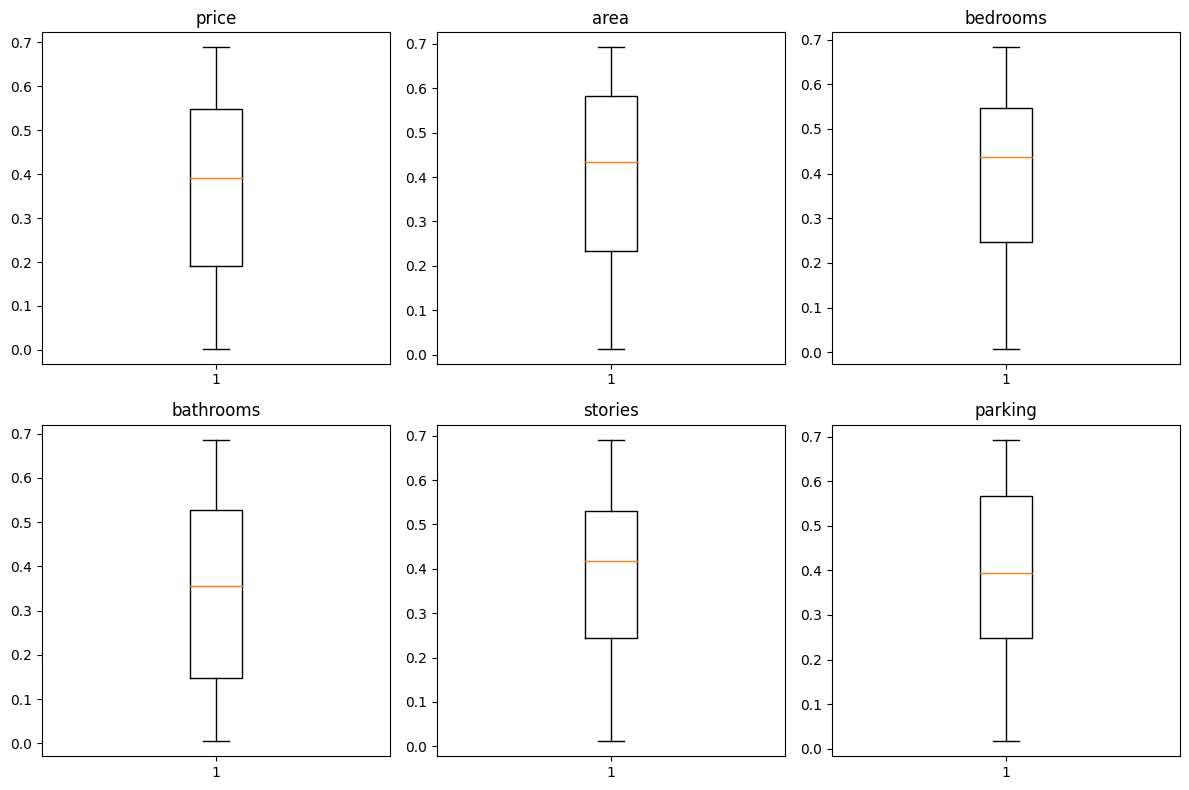

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Function to apply log transformation to specified columns
def log_transform(df, cols):
    df_transformed = df.copy()
    for col in cols:
        df_transformed[col] = np.log(df_transformed[col] + 1)  # Adding 1 to handle zero or negative values
    return df_transformed

# Example DataFrame creation (replace this with your actual data loading)
np.random.seed(0)
df = pd.DataFrame(np.random.rand(100, len(numerical_columns)), columns=numerical_columns)

# Log transform numerical columns
data_log_transformed = log_transform(df, numerical_columns)

# Check for NaN or infinite values
print("NaN values:\n", data_log_transformed.isnull().sum())
print("Infinite values:\n", data_log_transformed.isin([np.inf, -np.inf]).sum())

# Box plot for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(data_log_transformed.columns):
    plt.subplot(2, 3, i + 1)
    # Convert column data to numpy ndarray explicitly
    col_data = np.asarray(data_log_transformed[col])
    plt.boxplot(col_data)
    plt.title(col)

plt.tight_layout()
plt.show()


# Imputer function to handle the outliers and Box plots.

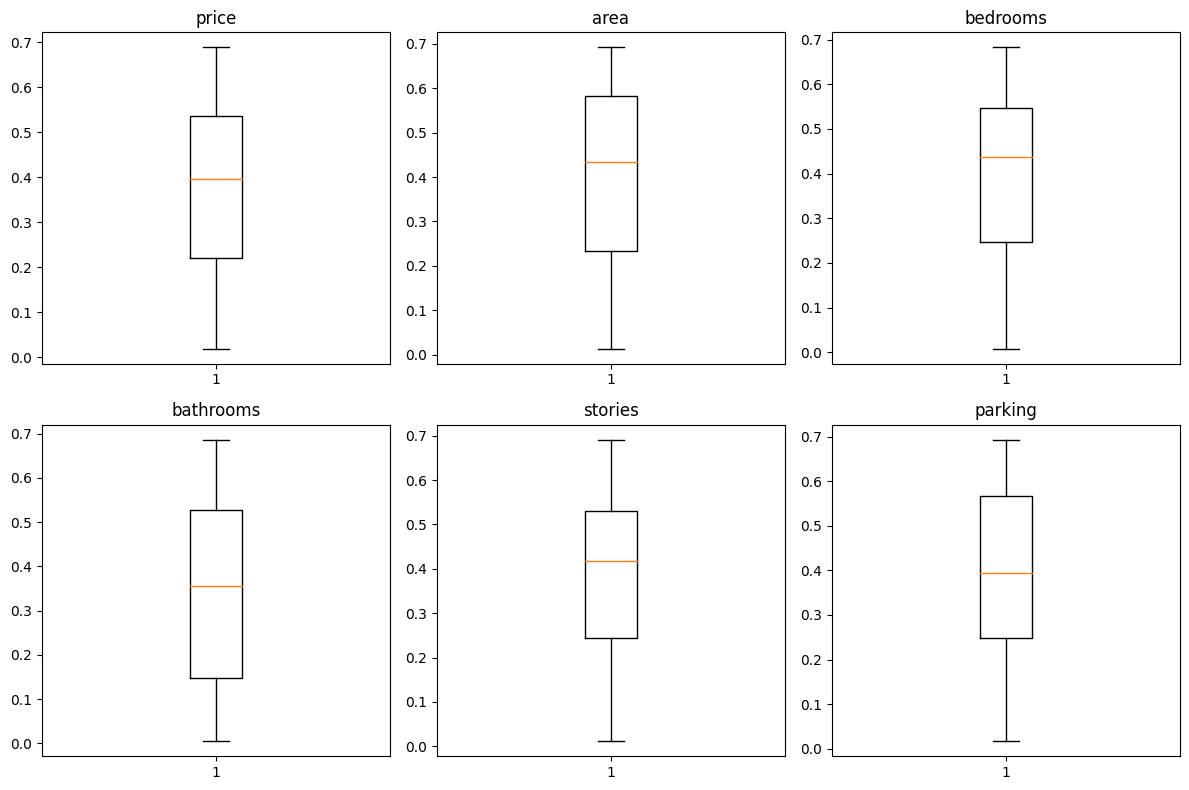

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Define numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Function to apply log transformation to specified columns
def log_transform(df, cols):
    df_transformed = df.copy()
    for col in cols:
        df_transformed[col] = np.log(df_transformed[col] + 1)  # Adding 1 to handle zero or negative values
    return df_transformed

# Example DataFrame creation (replace this with your actual data loading)
np.random.seed(0)
df = pd.DataFrame(np.random.rand(100, len(numerical_columns)), columns=numerical_columns)

# Simulate missing values
df.iloc[::10, 0] = np.nan  # introduce NaNs in 'price' column for demonstration

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Log transform numerical columns
data_log_transformed = log_transform(df, numerical_columns)

# Box plot for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(data_log_transformed.columns):
    plt.subplot(2, 3, i + 1)
    # Convert column data to numpy ndarray explicitly
    col_data = np.asarray(data_log_transformed[col])
    plt.boxplot(col_data)
    plt.title(col)

plt.tight_layout()
plt.show()


In [33]:
data_filtered.shape

(365, 13)

In [34]:
data_filtered.head(60)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2.0,yes,no,yes,no,no,2.0,no,semi-furnished
20,8750000,4320,3,1,2.0,yes,no,yes,yes,no,2.0,no,semi-furnished
22,8645000,8050,3,1,1.0,yes,yes,yes,no,yes,1.0,no,furnished
27,8400000,8875,3,1,1.0,yes,no,no,no,no,1.0,no,semi-furnished
40,7875000,6550,3,1,2.0,yes,no,yes,no,yes,0.0,yes,furnished
55,7350000,6000,3,1,2.0,yes,no,no,no,yes,1.0,no,unfurnished
61,7070000,8880,2,1,1.0,yes,no,no,no,yes,1.0,no,semi-furnished
68,6860000,6000,3,1,1.0,yes,no,no,no,yes,1.0,no,furnished
74,6650000,4040,3,1,2.0,yes,no,yes,yes,no,1.0,no,furnished
78,6650000,5700,3,1,1.0,yes,yes,yes,no,yes,2.0,yes,furnished


# Hanlding outliers for the categorical columns

### value count and Frequency analysis of the categorical variables

Value counts for mainroad:
mainroad
yes    306
no      59
Name: count, dtype: int64



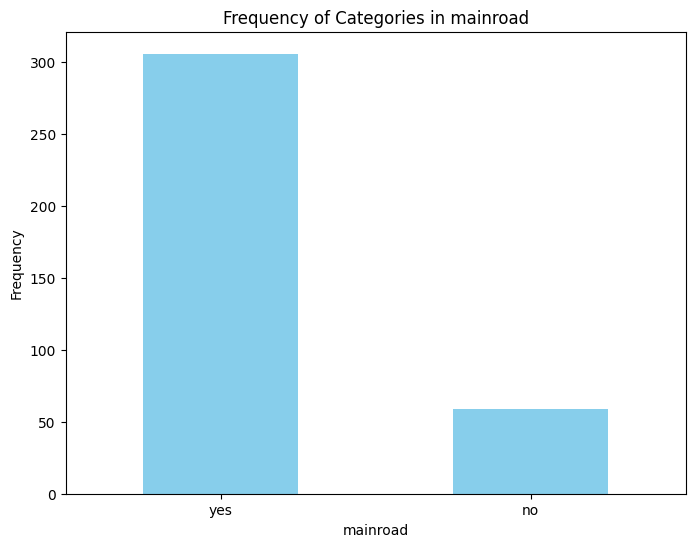

Value counts for guestroom:
guestroom
no     314
yes     51
Name: count, dtype: int64



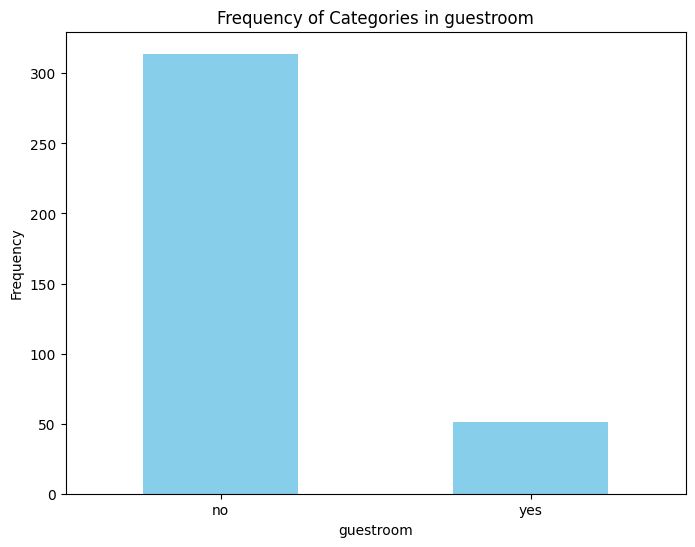

Value counts for basement:
basement
no     249
yes    116
Name: count, dtype: int64



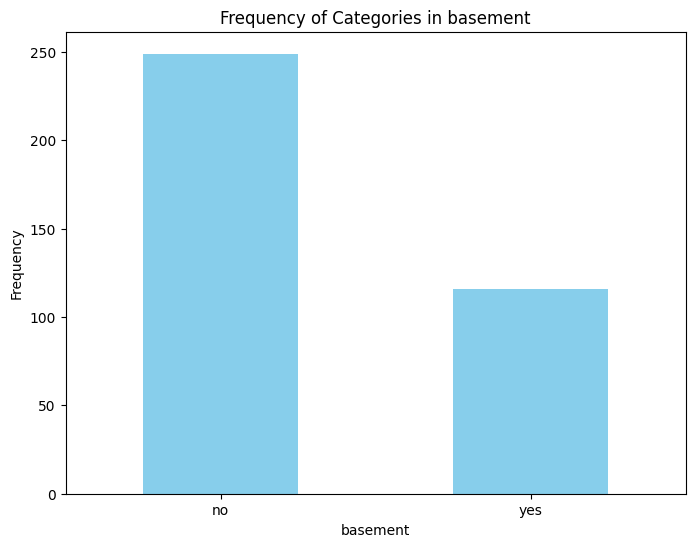

Value counts for hotwaterheating:
hotwaterheating
no     351
yes     14
Name: count, dtype: int64



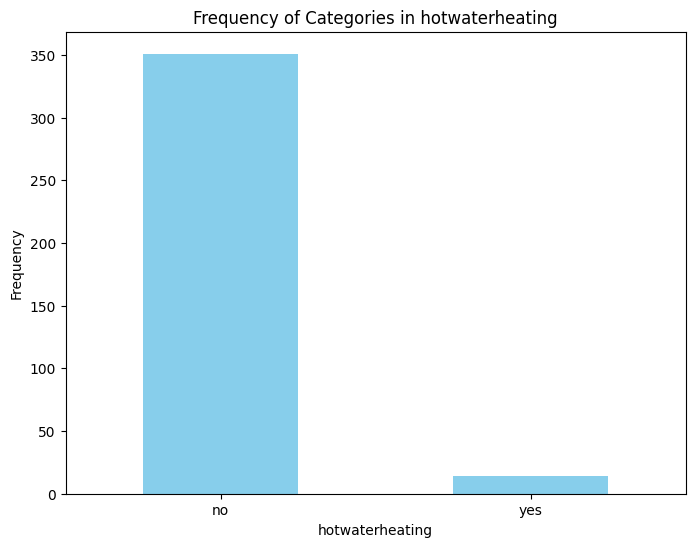

Value counts for airconditioning:
airconditioning
no     279
yes     86
Name: count, dtype: int64



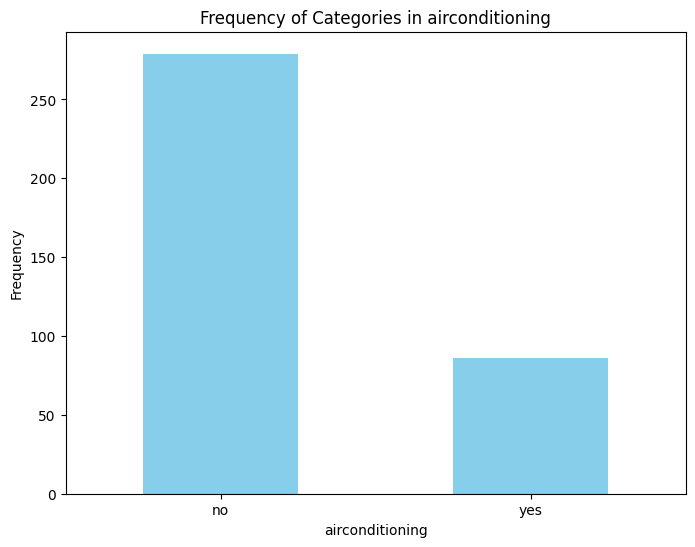

Value counts for prefarea:
prefarea
no     289
yes     76
Name: count, dtype: int64



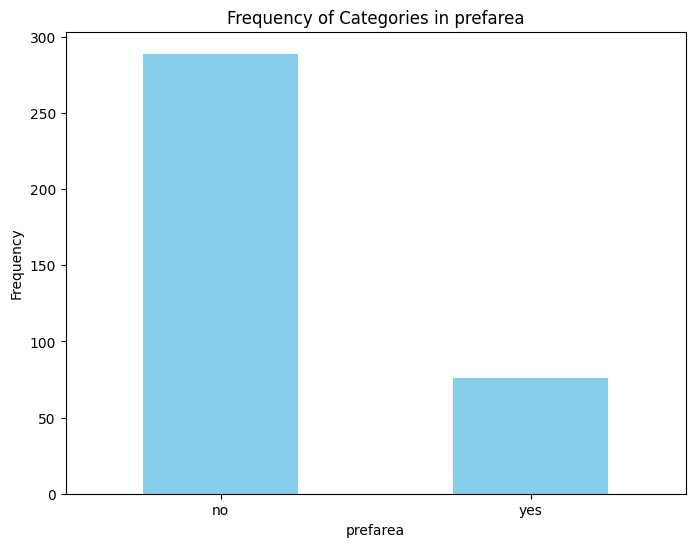

Value counts for furnishingstatus:
furnishingstatus
semi-furnished    150
unfurnished       138
furnished          77
Name: count, dtype: int64



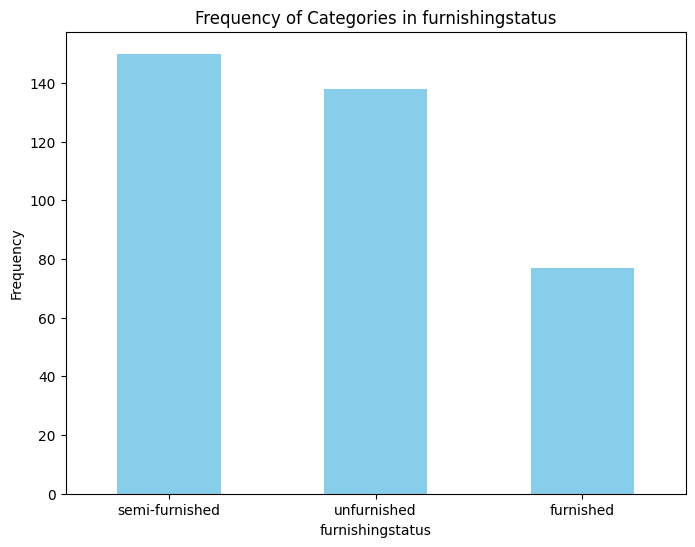

In [35]:
# Select categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

# Create bar plots and print value counts for each categorical column in data_filtered
for col in categorical_columns:
    # Calculate value counts
    vc = data_filtered[col].value_counts()
    
    # Print value counts
    print(f"Value counts for {col}:")
    print(vc)
    print()
    
    # Create bar plot
    plt.figure(figsize=(8, 6))
    vc.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

In [36]:
data_filtered.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2.0,yes,no,yes,no,no,2.0,no,semi-furnished
20,8750000,4320,3,1,2.0,yes,no,yes,yes,no,2.0,no,semi-furnished
22,8645000,8050,3,1,1.0,yes,yes,yes,no,yes,1.0,no,furnished
27,8400000,8875,3,1,1.0,yes,no,no,no,no,1.0,no,semi-furnished
40,7875000,6550,3,1,2.0,yes,no,yes,no,yes,0.0,yes,furnished


In [37]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data_filtered[col] = label_encoder.fit_transform(data_filtered[col])

# Check data types and adjusted categorical variables
print(data_filtered.dtypes)

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories             float64
mainroad              int32
guestroom             int32
basement              int32
hotwaterheating       int32
airconditioning       int32
parking             float64
prefarea              int32
furnishingstatus      int32
dtype: object


In [38]:
data_filtered.head(60)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2.0,1,0,1,0,0,2.0,0,1
20,8750000,4320,3,1,2.0,1,0,1,1,0,2.0,0,1
22,8645000,8050,3,1,1.0,1,1,1,0,1,1.0,0,0
27,8400000,8875,3,1,1.0,1,0,0,0,0,1.0,0,1
40,7875000,6550,3,1,2.0,1,0,1,0,1,0.0,1,0
55,7350000,6000,3,1,2.0,1,0,0,0,1,1.0,0,2
61,7070000,8880,2,1,1.0,1,0,0,0,1,1.0,0,1
68,6860000,6000,3,1,1.0,1,0,0,0,1,1.0,0,0
74,6650000,4040,3,1,2.0,1,0,1,1,0,1.0,0,0
78,6650000,5700,3,1,1.0,1,1,1,0,1,2.0,1,0


In [39]:
import pandas as pd



# Function to categorize prices
def categorize_price(price):
    if price >= data_filtered['price'].quantile(0.75):
        return 'High'
    elif price >= data_filtered['price'].quantile(0.5):
        return 'Medium'
    else:
        return 'Low'

# Add a new column 'price_category' based on 'price'
data_filtered['price_category'] = data_filtered['price'].apply(categorize_price)

# Print the updated DataFrame to verify
print(data_filtered)

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_dataset.csv', index=False)


       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15   9100000  6000         4          1      2.0         1          0   
20   8750000  4320         3          1      2.0         1          0   
22   8645000  8050         3          1      1.0         1          1   
27   8400000  8875         3          1      1.0         1          0   
40   7875000  6550         3          1      2.0         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1      1.0         1          0   
541  1767150  2400         3          1      1.0         0          0   
542  1750000  3620         2          1      1.0         1          0   
543  1750000  2910         3          1      1.0         0          0   
544  1750000  3850         3          1      2.0         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
15          1                0                0      

In [40]:
data_filtered.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_category
15,9100000,6000,4,1,2.0,1,0,1,0,0,2.0,0,1,High
20,8750000,4320,3,1,2.0,1,0,1,1,0,2.0,0,1,High
22,8645000,8050,3,1,1.0,1,1,1,0,1,1.0,0,0,High
27,8400000,8875,3,1,1.0,1,0,0,0,0,1.0,0,1,High
40,7875000,6550,3,1,2.0,1,0,1,0,1,0.0,1,0,High


Mean Squared Error: 1663957631367.856
Root Mean Squared Error: 1289944.8171793458
Mean Absolute Error: 1011418.3493842252
R^2 Score: 0.22012002269656394


InvalidIndexError: (slice(None, None, None), None)

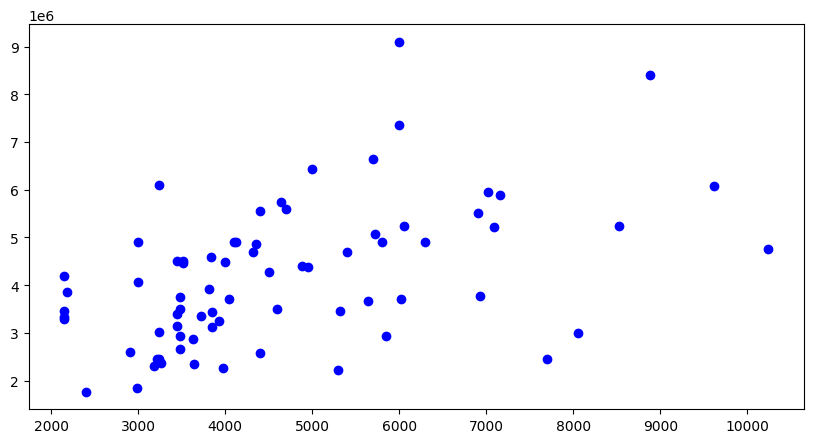

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib  # Importing joblib for model persistence

# Assuming 'data_filtered' is your filtered DataFrame containing 'area' and 'price' columns

# Use only the 'area' column as the feature and 'price' as the target
X = data_filtered[['area']]
y = data_filtered['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Save the trained model using joblib
model_filename = 'Regression_Model/linear_regression_model.pkl'
joblib.dump(linear_regressor, model_filename)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 5))

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()

# Add the accuracy metrics to the plot
plt.text(0.05, 0.95, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.80, f'R^2 Score: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


In [42]:
from sklearn.metrics import explained_variance_score

# Calculate explained variance score
explained_var_score = explained_variance_score(y_test, y_pred)

print(f'Explained Variance Score: {explained_var_score:.2f}')


Explained Variance Score: 0.23


Mean Squared Error: 1123698800481.1355
Root Mean Squared Error: 1060046.602976084
Mean Absolute Error: 729428.8037105046
R^2 Score: 0.4733338286415846


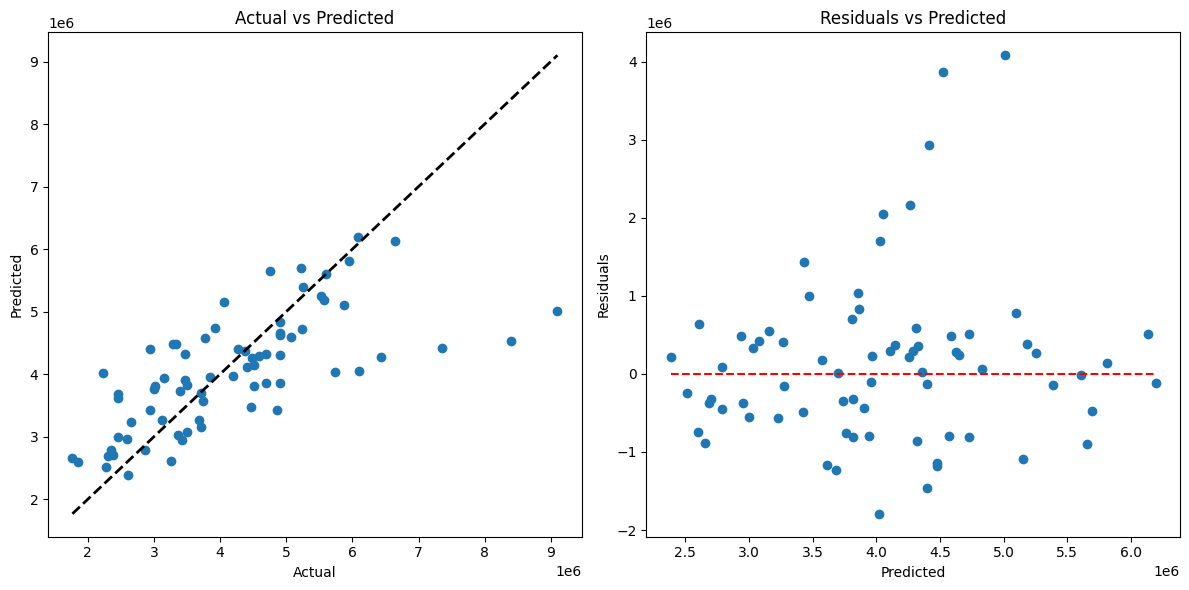

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib  # Importing joblib for model persistence

# Assuming data_filtered is your dataset with multiple features including 'price' as the target variable

# Preprocess the data (if necessary)
X = data_filtered.drop(columns=['price','price_category'], axis=1)  # Features
y = data_filtered['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Save the trained model using joblib
model_filename = 'Regression_Model/multiple_linear_regression_model.pkl'
joblib.dump(linear_regressor, model_filename)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Plot the predicted vs actual values and residuals
plt.figure(figsize=(12, 6))

# Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()


Accuracy Score: 0.58
Confusion Matrix:
[[13 13  0]
 [ 6 29  0]
 [ 9  3  0]]


C:\Users\linpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\linpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\linpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


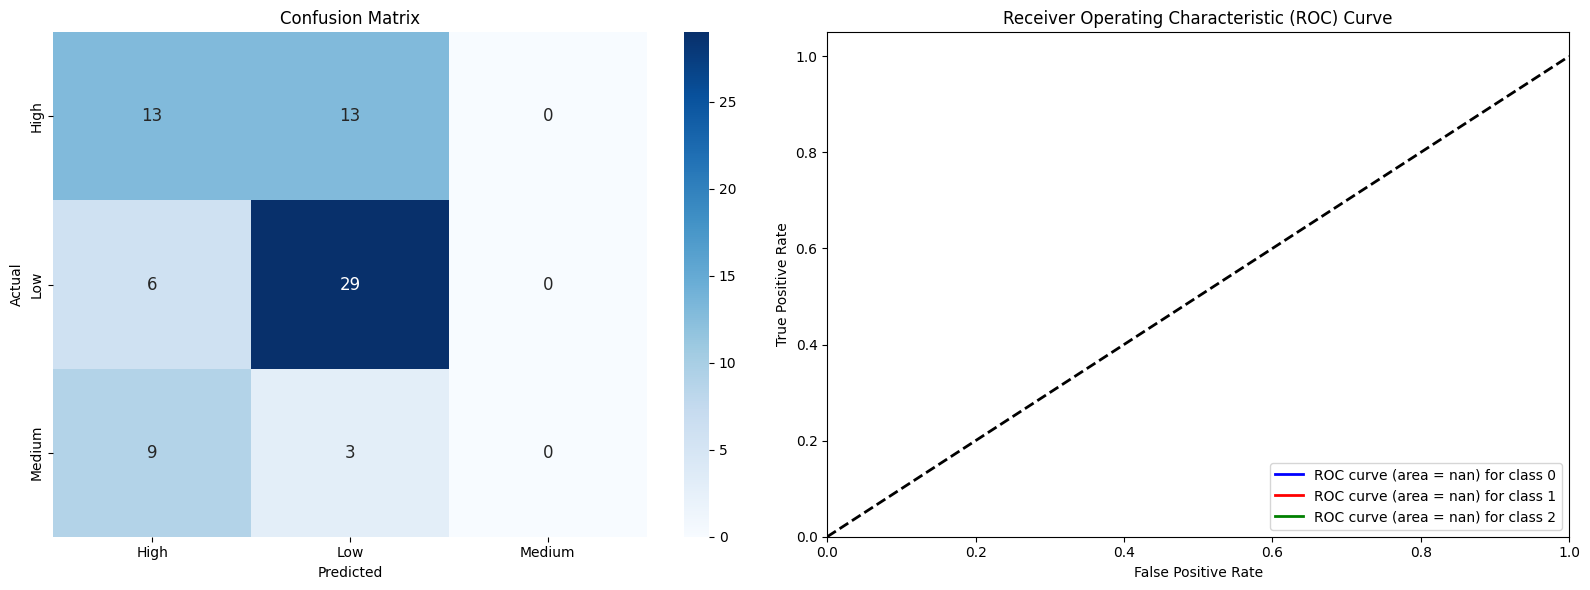

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Assuming 'data_filtered' is your dataset with features including 'price_category' as the target variable

# Preprocess the data (if necessary)
# Assuming categorical variables are already encoded appropriately

# Separate features and target variable
X = data_filtered.drop('price_category', axis=1)  # Features
y = data_filtered['price_category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_regressor = LogisticRegression(max_iter=1000, multi_class='auto')  # Increase max_iter if needed
logistic_regressor.fit(X_train, y_train)

# Save the trained model using joblib
model_filename = 'Classifications_Model/logistic_regression_model.pkl'
joblib.dump(logistic_regressor, model_filename)

# Predict on the test set
y_pred = logistic_regressor.predict(X_test)
y_prob = logistic_regressor.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy score and confusion matrix
print(f'Accuracy Score: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(logistic_regressor.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot confusion matrix and ROC curves
plt.figure(figsize=(16, 6))

# Plot confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": 12}, 
            xticklabels=logistic_regressor.classes_, yticklabels=logistic_regressor.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Plot ROC curves
plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i, color in zip(range(len(logistic_regressor.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


Accuracy Score: 1.00
Confusion Matrix:
[[26  0  0]
 [ 0 12  0]
 [ 0  0 35]]


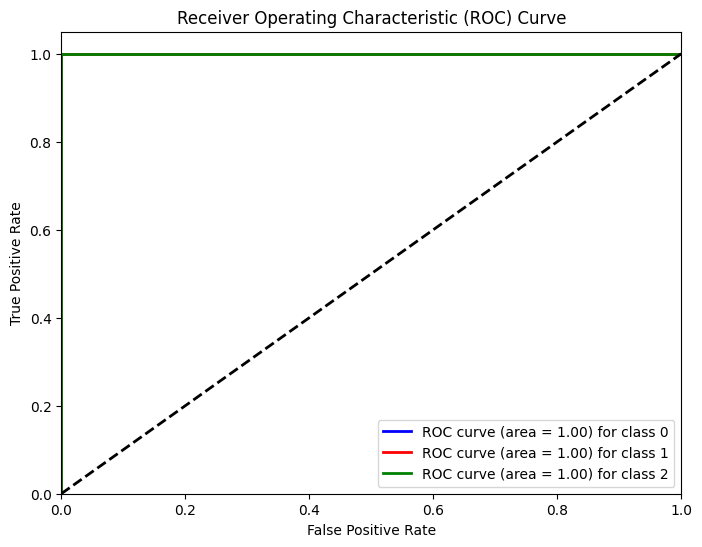

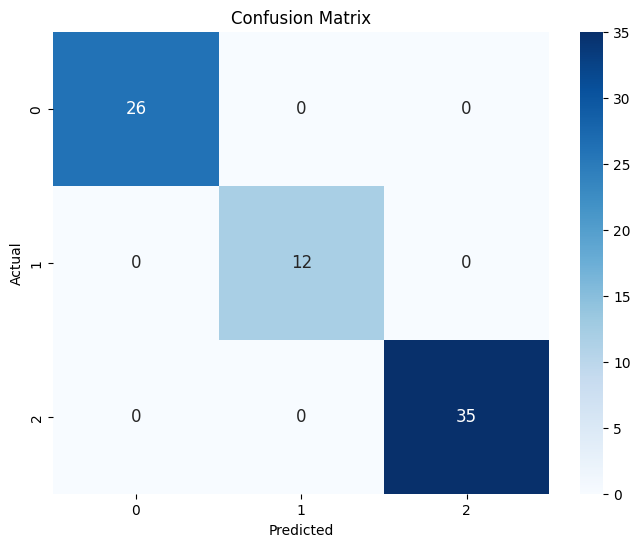

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming 'data_filtered' is your dataset with features including 'price_category' as the target variable

# Preprocess the data (if necessary)
# Assuming categorical variables are already encoded appropriately

# Separate features and target variable
X = data_filtered.drop('price_category', axis=1)  # Features
y = data_filtered['price_category']  # Target variable

# Binarize the output
y_bin = label_binarize(y, classes=y.unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
classifier = OneVsRestClassifier(decision_tree)
classifier.fit(X_train, y_train)

# Save the trained model using joblib
model_filename = 'Classifications_Model/decision_tree_model.pkl'
joblib.dump(classifier, model_filename)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(conf_matrix)

# Compute ROC curve and ROC area for each class
y_score = classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i, color in zip(range(y_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\linpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\linpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\linpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


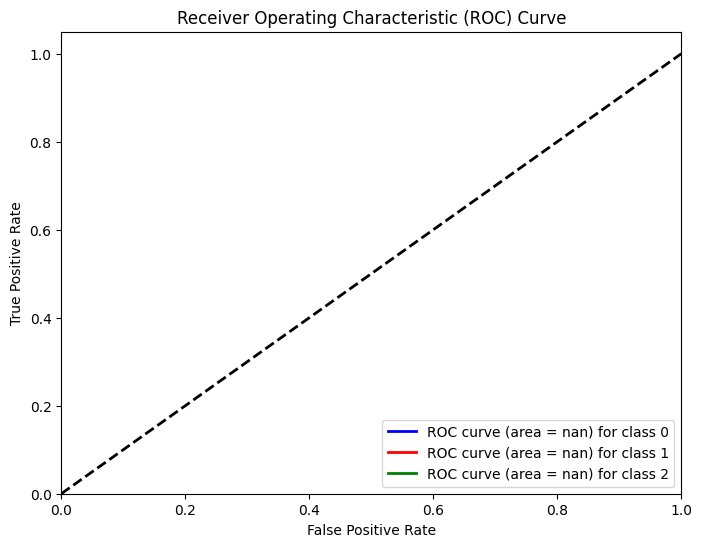

Accuracy Score: 0.97
Confusion Matrix:
[[24  0  2]
 [ 0 35  0]
 [ 0  0 12]]


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
import joblib
import numpy as np

# Assuming 'data_filtered' is your dataset with features including 'price_category' as the target variable

# Separate features and target variable
X = data_filtered.drop('price_category', axis=1)  # Features
y = data_filtered['price_category']  # Target variable

# Binarize the output
y_bin = label_binarize(y, classes=y.unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = random_forest.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predict on the test set and evaluate
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming 'data_filtered' is your dataset with features including 'price_category' as the target variable

# Separate features and target variable
X = data_filtered.drop('price_category', axis=1)  # Features
y = data_filtered['price_category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Train a Support Vector Machine classifier with OneVsRest strategy
svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
svm_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(svm_classifier.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=svm_classifier.classes_)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print ROC curve data
for i in range(n_classes):
    print(f"Class {svm_classifier.classes_[i]} - ROC AUC: {roc_auc[i]}")

# Plotting ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {svm_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)  # Add grid for better visualization
plt.show()

# Predict on the test set and evaluate
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


X_train shape: (292, 13), y_train shape: (292,)
X_test shape: (73, 13), y_test shape: (73,)
